In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
import numpy as np
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore")





c:\Apps\Anaconda\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
#pip install pyLDAvis.gensim

In [2]:
import pandas as pd

In [4]:
# Read in the data
tweets_df = pd.read_csv(r"C:\Users\user\PycharmProjects\TwitterYouths\lgbtq_hashtags.csv")
tweets_df.head(10)


,date,id,content,username,likeCount,retweetCount,location,hashtag,source
0,2023-04-12 08:05:43+00:00,1646062024852668418,風の強い日でした\n#セルフポートレート #nana_camera \n#中性俳優 #モデル...,irodor1midori,0,0,NaN,"['セルフポートレート', 'nana_camera', '中性俳優', 'モデル', 'L...","<a href=""http://twitter.com/download/android"" ..."
1,2023-04-12 08:05:34+00:00,1646061984264355841,#Pokekara 友の多重ハモリコーラスで盛り上げてくれています。 #中山美穂『 #色ホワ...,haoyu52,0,0,日本 東京,"['Pokekara', '中山美穂', '色ホワイトブレンド', 'G組合員', 'Gay...","<a href=""http://www.pokekara.com"" rel=""nofollo..."
2,2023-04-12 08:04:49+00:00,1646061799136174082,運動すると頭を空に出来るから気になってたことを整理するきっかけにもなる👏👏\n終わった後の達...,ken19891016,0,0,NaN,"['悩み相談', '悩み聞いて', 'カウンセラー', 'ケアマネ', 'LGBTQ', '...","<a href=""http://twitter.com/download/iphone"" r..."
3,2023-04-12 08:04:28+00:00,1646061709746896897,#gay #LaMasDraga #boy #gaykiss #kep1er #LESSER...,aaasael27,0,0,"Ahome, Sinaloa","['gay', 'LaMasDraga', 'boy', 'gaykiss', 'kep1e...","<a href=""http://twitter.com/download/iphone"" r..."
4,2023-04-12 08:04:04+00:00,1646061607829618688,Sen ancak @RTErdogan'ın tırnağından özür diler...,marjinal_koylu,0,0,NaN,"['LGBT', 'ErdoğanYineKazanacak']","<a href=""http://twitter.com/download/android"" ..."
5,2023-04-12 08:04:02+00:00,1646061599852048385,Hora de descansar estas nalgas jajaja #gay htt...,pepecol69,0,0,"Colima, México",['gay'],"<a href=""http://twitter.com/download/android"" ..."
6,2023-04-12 08:03:58+00:00,1646061584991567873,Pussy! \n\n#LGBTQIA https://t.co/Dr0QpVKr0T,JustChillieh,1,0,"Palm Beach County, FL",['LGBTQIA'],"<a href=""http://twitter.com/download/iphone"" r..."
7,2023-04-12 08:03:04+00:00,1646061355621928960,La Procura di #Padova ha chiesto al Comune gli...,BiribissiBlog,0,0,"Sanremo, Liguria","['Padova', 'gay', 'ANSA']","<a href=""http://twitter.com/download/android"" ..."
8,2023-04-12 08:02:57+00:00,1646061327285116929,Research is key to every #Crypto investment🗣️ ...,RBIF_USA,2,0,"Buffalo, NY","['Crypto', 'DYOR', 'Finance', 'RoboInu', 'Bank...","<a href=""http://twitter.com/download/iphone"" r..."
9,2023-04-12 08:02:54+00:00,1646061316057219073,髪伸びました。\nL/20代/東北\n好きなものは、きなこ餅せんべい\n嫌いなものは信号と横...,izumi_Si3,0,0,NaN,"['LGBTQ', 'LGBTさんと繋がりたい', 'セクマイ', 'セクマイさんと繋がりた...","<a href=""http://twitter.com/download/android"" ..."


In [5]:
tweets_df.shape

(15002, 9)

## DATA CLEANING

In [6]:

# Removing duplicate tweets
tweets_df.drop_duplicates(subset="text",keep="first",inplace=True)


KeyError: Index(['text'], dtype='object')

In [4]:
# Remove symbols, numbers, and URL links
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r'\d+', '', x))
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r'https?://\S+', '', x))
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r'\d+', '', x))
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub(r'#\S+', '', x))
tweets_df["text"]= tweets_df['text'].replace(r'\r', ' ', regex=True)
tweets_df["text"]= tweets_df['text'].replace(r'\n', ' ', regex=True)


In [5]:
tweets_df["text"]

0        BossGirls Present How to survive the bear mark...
1        UNFPA Ghana in partnership with Hay Foundation...
2        Extraordinary important words from the pen of ...
3        World Aids Day st December   httpstcolLrQKjCVF...
4        Good morning Family chilly  day at  degrees Co...
                               ...                        
12953    MerryXmas   MahayogiBabaGangaiNath  wowom Yoga...
12954    MerryXmas   MahayogiBabaGangaiNath  wowom Yoga...
12956    Happy Christmas    We hope you have a wonderfu...
12957    Learn The  Ways to Wellbeing in the leadup to ...
12959     NEW MHFA Course alert     We consistently rec...
Name: text, Length: 12173, dtype: object

In [6]:
# Remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

tweets_df['text'] = tweets_df['text'].apply(remove_emojis)



In [7]:
# Remove stop words and lemmatize
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def process_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
    

tweets_df['text'] = tweets_df['text'].apply(process_text)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jeremy_Gachanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
## removing non english words
nltk.download('words')
english_words = set(nltk.corpus.words.words())

# Define a function that takes in a string and returns a list of English words
def filter_english(text):
    words = text.split()
    english_words_x = [word for word in words if word in english_words]
    return ' '.join(english_words_x)

# Apply the function to the column to remove non-English words
tweets_df['text'] = tweets_df['text'].apply(filter_english)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Jeremy_Gachanja\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
tweets_df[["text"]]

,text
0,present survive bear market without going craz...
1,partnership hay foundation present click link ...
2,extraordinary important word pen cook
3,world aid day st aid awareness st hepatitis s
4,good morning family chilly day degree coffee h...
...,...
12953,awareness health addiction autism depression s...
12954,awareness health addiction autism depression s...
12956,happy hope wonderful day take care peaceful team
12957,learn way try something new support mental hea...


## TOPIC MODELLING USING LDA

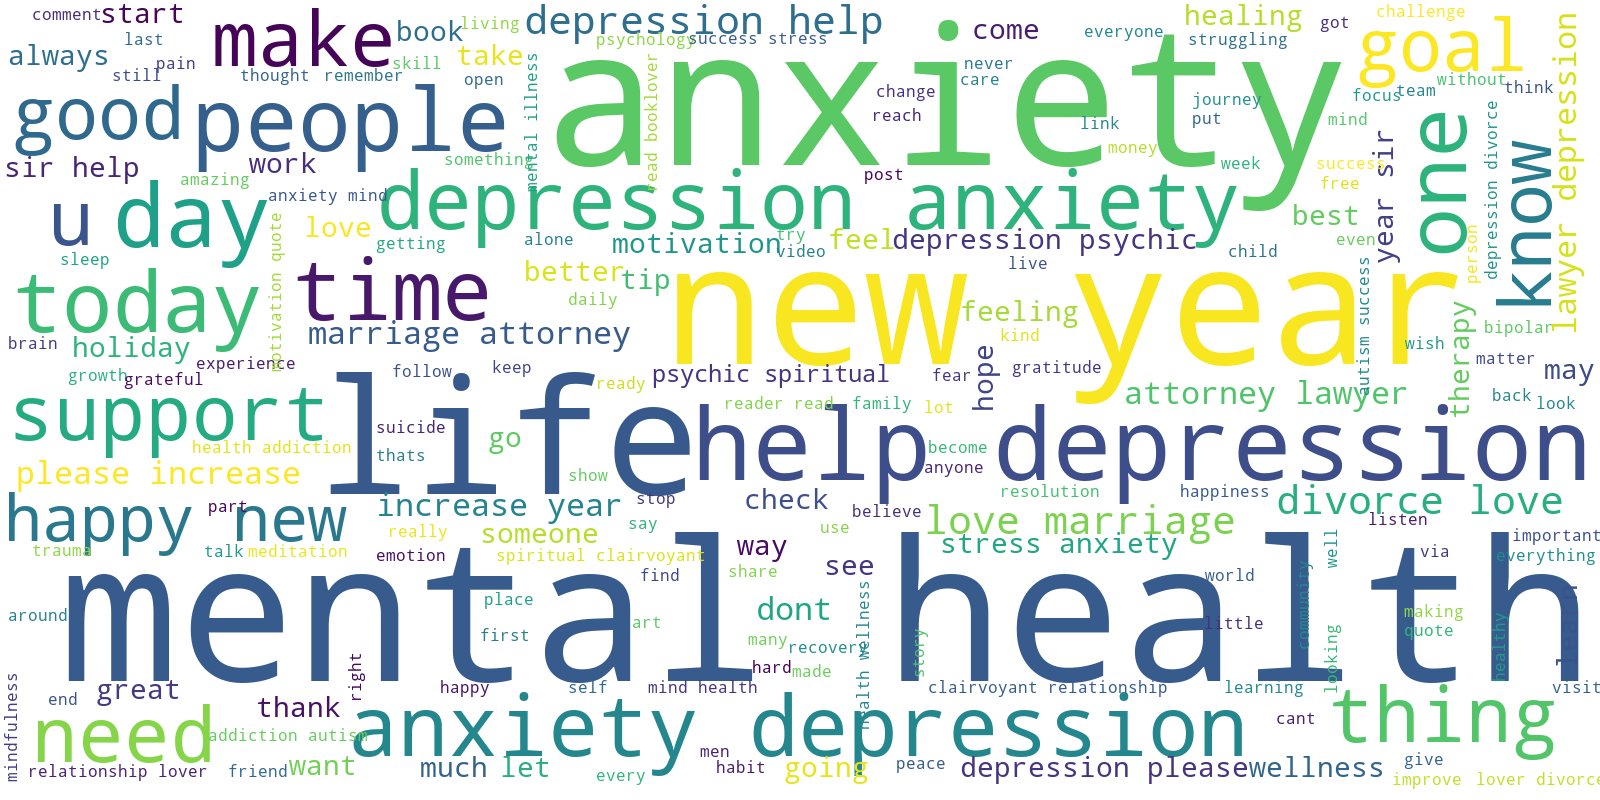

In [10]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',scale=4)
# Join the different processed titles together.
long_string = ','.join(list(tweets_df['text'].values))
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        

In [13]:
# Create Dictionary
import gensim.corpora as corpora
data = tweets_df.text.values.tolist()
data_words = list(sent_to_words(data))
# Create Corpus
id2word = corpora.Dictionary(data_words)
# Term Document Frequency
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])




[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [ ]:
### This code takes approximately 72 hrs to run , Here the code compares the possible 3825 topic models based on different values of alpha, beta and number of topics
compare_model = {"alpha":[],"beta":[],"topics":[],"coherence":[],"perplexity":[]}
for topic in list(range(2,18)):
    for a in list(np.arange(0.01,1,0.07)):
        for b in list(np.arange(0.01,1,0.07)):
            lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=topic, eta=b,alpha=a)
            coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
            compare_model["alpha"].append(a)
            compare_model["beta"].append(b)
            compare_model["topics"].append(topic)
            compare_model["coherence"].append(coherence_model_lda.get_coherence())
            compare_model["coherence"].append(lda_model.log_perplexity(data_words))

compare_model_df = pd.DataFrame(compare_model)        

#compare_model_df.to_csv("models.csv")



In [29]:
#### results for the model with lowest perplexity
compare_model_data = pd.read_csv(r"C:\ILAB\masters notes\module 4\Text analytics\Fin exam term paper\paper\models.csv").sort_values(by="perplexity")
compare_model_data.head()

,Unnamed: 0,alpha,beta,topics,coherence,perplexity
3510,3510,0.64,0.01,17,0.190562,-10.557742
3525,3525,0.71,0.01,17,0.195963,-10.547017
3540,3540,0.78,0.01,17,0.177165,-10.531043
3495,3495,0.57,0.01,17,0.197342,-10.529390
3555,3555,0.85,0.01,17,0.197778,-10.506804


In [30]:
#### results for the model with highest coherence
compare_model_data = pd.read_csv(r"C:\ILAB\masters notes\module 4\Text analytics\Fin exam term paper\paper\models.csv").sort_values(by="coherence",ascending=False)
compare_model_data.head()

,Unnamed: 0,alpha,beta,topics,coherence,perplexity
230,230,0.01,0.36,3,0.312910,-7.403851
71,71,0.29,0.78,2,0.302760,-7.421194
2070,2070,0.22,0.01,11,0.301517,-8.296883
1651,1651,0.36,0.08,9,0.298012,-7.977959
285,285,0.29,0.01,3,0.296955,-7.764504


In [18]:

# number of topics
num_topics = 3# Build LDA model
lda_model_3 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, eta=0.36,alpha=0.01)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"health" + 0.013*"mental" + 0.011*"life" + 0.011*"anxiety" + '
  '0.011*"new" + 0.010*"help" + 0.009*"year" + 0.007*"depression" + '
  '0.007*"love" + 0.006*"thing"'),
 (1,
  '0.030*"anxiety" + 0.025*"depression" + 0.014*"health" + 0.014*"year" + '
  '0.011*"help" + 0.010*"time" + 0.009*"mental" + 0.008*"stress" + 0.008*"new" '
  '+ 0.007*"support"'),
 (2,
  '0.031*"depression" + 0.018*"year" + 0.016*"anxiety" + 0.013*"love" + '
  '0.013*"help" + 0.011*"new" + 0.010*"health" + 0.009*"mental" + 0.008*"life" '
  '+ 0.007*"please"')]


In [20]:
# number of topics
num_topics2 = 17
# Build LDA model
lda_model_17 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics2, eta=0.64,alpha=0.01)# Print the Keyword in the 10 topics
pprint(lda_model_17.print_topics())
doc_lda = lda_model_17[corpus]

[(0,
  '0.013*"health" + 0.010*"mental" + 0.009*"life" + 0.008*"anxiety" + '
  '0.007*"depression" + 0.007*"year" + 0.005*"new" + 0.005*"make" + '
  '0.005*"people" + 0.004*"get"'),
 (1,
  '0.021*"depression" + 0.015*"love" + 0.009*"anxiety" + 0.008*"marriage" + '
  '0.008*"divorce" + 0.008*"attorney" + 0.008*"lawyer" + 0.007*"year" + '
  '0.007*"life" + 0.007*"health"'),
 (2,
  '0.015*"anxiety" + 0.012*"health" + 0.009*"mental" + 0.009*"year" + '
  '0.009*"new" + 0.008*"depression" + 0.005*"life" + 0.005*"mind" + '
  '0.004*"let" + 0.004*"dont"'),
 (3,
  '0.011*"anxiety" + 0.010*"year" + 0.009*"health" + 0.008*"depression" + '
  '0.008*"new" + 0.006*"love" + 0.006*"mental" + 0.005*"today" + 0.005*"time" '
  '+ 0.005*"life"'),
 (4,
  '0.009*"year" + 0.008*"new" + 0.006*"depression" + 0.005*"anxiety" + '
  '0.005*"help" + 0.004*"time" + 0.004*"happy" + 0.004*"health" + 0.004*"need" '
  '+ 0.003*"mental"'),
 (5,
  '0.009*"anxiety" + 0.008*"mental" + 0.008*"health" + 0.007*"new" + '
  '0.

In [27]:
#### calling on topic model graph visual

### 3 topic model

LDAvis_prepared_3 = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared_3

c:\Apps\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.005055 -0.041629       1        1  33.993112
2     -0.040420  0.024489       2        1  33.978206
0      0.045474  0.017140       3        1  32.028682, topic_info=            Term         Freq        Total Category  logprob  loglift
120   depression  2361.000000  2361.000000  Default  30.0000  30.0000
146      anxiety  2102.000000  2102.000000  Default  29.0000  29.0000
1786         sir   236.000000   236.000000  Default  28.0000  28.0000
364     increase   258.000000   258.000000  Default  27.0000  27.0000
6721    attorney   242.000000   242.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
27           day   178.989529   616.903516   Topic3  -5.2995  -0.0988
40         happy   163.054790   571.763501   Topic3  -5.3928  -0.1161
120   depression   254.247503  2361.113621   Topic3  -4.9486  -1.0900
356         time   133.731509   647.644567   Topic3  -5.5910  -0.4390
396         best   116.346998   312.062819   Topic3  -5.7303   0.1519

[269 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
646       3  0.782422  abandon
463       1  0.748191    abuse
463       2  0.024940    abuse
463       3  0.224457    abuse
1142      1  0.877674    added
...     ...       ...      ...
123       2  0.220384  writing
123       3  0.621082  writing
149       1  0.348443     year
149       2  0.446059     year
149       3  0.205575     year

[444 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [28]:
#### calling on topic model graph visual

### 17 topic model

LDAvis_prepared_17 = gensimvis.prepare(lda_model_17, corpus, id2word)
LDAvis_prepared_17

c:\Apps\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.003525  0.020846       1        1  11.269140
0      0.016541  0.013010       2        1   9.882810
13    -0.028908  0.006560       3        1   8.723670
8     -0.001201  0.010305       4        1   7.342450
1     -0.041519 -0.004727       5        1   6.607635
16     0.003813  0.009383       6        1   6.310201
2      0.022498  0.010543       7        1   6.306826
10     0.006379  0.012225       8        1   6.263713
3      0.003849  0.002227       9        1   5.458913
14     0.010856 -0.003422      10        1   4.648388
9     -0.003224  0.007318      11        1   4.570285
11     0.010356 -0.011777      12        1   4.521679
5      0.010943 -0.007690      13        1   4.360888
12    -0.031429 -0.008719      14        1   3.827745
4      0.009044 -0.026241      15        1   3.758588
6      0.004200 -0.010194      16        1   3.517778
7      0.011327 -0.019645      17        1   2.629291, topic_info=             Term         Freq        Total Category  logprob  loglift
120    depression  1531.000000  1531.000000  Default  30.0000  30.0000
121          help   798.000000   798.000000  Default  29.0000  29.0000
146       anxiety  1345.000000  1345.000000  Default  28.0000  28.0000
6721     attorney   167.000000   167.000000  Default  27.0000  27.0000
600      marriage   171.000000   171.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
27            day     6.848161   405.075434  Topic17  -6.0630  -0.4416
65        support     5.982440   280.443558  Topic17  -6.1981  -0.2091
197   mindfulness     5.543411   221.811120  Topic17  -6.2743  -0.0508
466          book     5.455880   213.038203  Topic17  -6.2903  -0.0263
207        stress     5.601205   310.497743  Topic17  -6.2640  -0.3767

[1310 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4298      1  0.156253  abandoned
4298      2  0.078126  abandoned
4298      6  0.234379  abandoned
4298      8  0.156253  abandoned
4298     10  0.078126  abandoned
...     ...       ...        ...
4204      6  0.079356       zoom
4204      8  0.238067       zoom
4204     11  0.079356       zoom
4204     12  0.079356       zoom
4204     17  0.079356       zoom

[7231 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 1, 14, 9, 2, 17, 3, 11, 4, 15, 10, 12, 6, 13, 5, 7, 8])

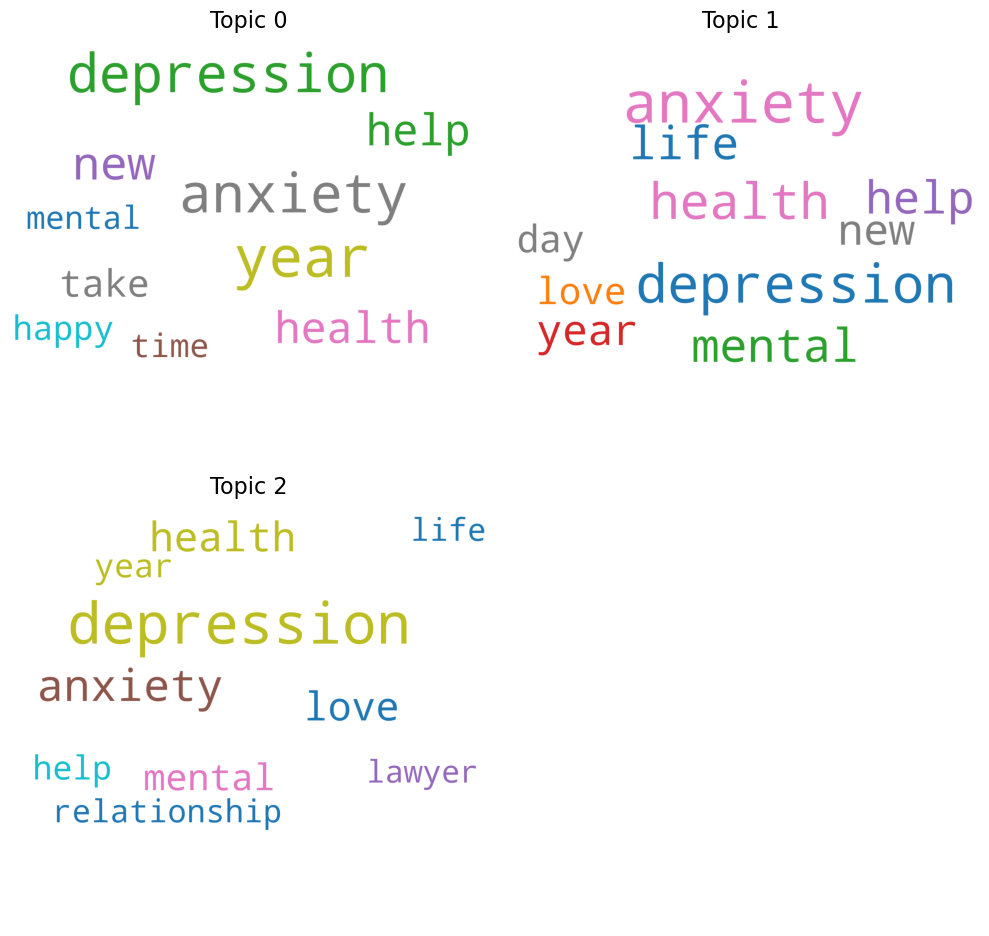

In [38]:
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  prefer_horizontal=1.0)

topics = lda_model_3.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    except IndexError:
        continue


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()